# Pair Trading With Cryptocurrencies Part 1

## How To Scrape Cryptocurrency Data Using Python

## Introduction

Cryptocurrencies (or cryptos) captured the world's imagination during the last couple of years. 
From their spectacular rise in 2017, to their equally hard fall in 2018, and to their most recent revival this year. Cryptocurrencies and the blockchain technology powering them are regarded as disruptive forces, proposing an alternative decentralized monetary system. They have also gathered their fair share of criticism. 
Cryptocurrencies are accused of facilitating transfer of "dirty money" between criminals. They provided mind-boggling returns a couple years back and earned the reputation of being a "get rich quick" scheme.

In this article, we turn our attention to cryptocurrencies as investment vehicles sharing common characteristics with other asset classes like FX, commodities and precious metals. Cryptocurrencies, like fiat currencies, allow for easy transfer of wealth between individuals and businesses. They are similar to commodities with regards to the limited supply they offer. Cryptocurrencies have drawn comparisons to gold which is viewed as a "safe-haven" investment.

This article is divided into two parts. In this first article, I will illustrate how to source cryptocurrency historical data. For the next article, I will demonstrate how to backtest a pair-trading strategy using the cryptocurrency dataset collected here.

## Retrieving Cryptocurrencies Historical Data

We retrieve data mainly through databases, APIs and web pages. As I don't have access to a database providing cryptocurrency historical data. I will use APIs and scrape web pages to retrieve cryptocurrency data necessary for backtesting purposes.

### Step By Step
1. Source data via APIs.
2. Retrieve data via scraping web pages.

You can find the code on https://github.com/DinodC/pair-trading-cryptos.


## Via APIs
APIs provide a convenient way to source data from providers, exchanges and other platforms.

### 1. Quandl

[Quandl](https://www.quandl.com) is a financial, economic and alternative data provider. It specializes in distributing alternative data to investment firms, arguing that non-traditional data is an untapped source of alpha. Quandl sources data from various providers such as exchanges, tech firms and other companies. It has free and premium datasets to choose from. 

To pull data from Quandl, you need to:
1. Register with Quandl to get an API key, it is free of charge.
2. Pull data from Quandl using their API, or you can use Python, R and Excel.
3. If you use Python, then you need to install Quandl Python package quandl or pandas-datareader.

Here we use quandl package to retrieve cryptocurrency data from Bitfinex and GDAX datasets. 

### Bitfinex 

[Bitfinex](https://www.bitfinex.com) is one of the largest cryptocurrency trading platforms in the world, and is headquartered in Hong Kong. It provides an extensive list of crypto-to-crypto and crypto-to-fiat datasets. Collected data using quandl's get function comes in a convenient DataFrame object. A drawback is the limited OHLCV (Open-High-Low-Close-Volume) historical data spanning 2 years only.

In [1]:
# # Quandl Python package
# import quandl

# # Set API key
# quandl.ApiConfig.api_key = 'Your API Authentication Key'

# # Set parameters
# start = '2009-01-01'
# exchange = 'BITFINEX'
# id = 'ETHUSD'

# data = quandl.get(exchange + '/' + id, start_date=start)

### GDAX (Global Digital Asset Exchange) 

[GDAX](https://pro.coinbase.com) is a popular cryptocurrency exchange headquartered in San Francisco, California. It was formerly known as Coinbase Exchange. Pulled OHLCV historical data from GDAX spans 3y, which is longer than Bitfinex datasets. Collected data using quandl's get function comes in a convenient DataFrame object. A drawback is the limited number of cryptocurrency datasets compared to Bitfinex.

In [2]:
# # Quandl Python package
# import quandl

# # Set API key
# quandl.ApiConfig.api_key = 'Your API Authentication Key'

# # Set parameters
# start = '2009-01-01'
# exchange = 'GDAX'
# id = 'ETH_USD'

# data = quandl.get(exchange + '/' + id, start_date=start)

### 2. CoinAPI

[CoinAPI](https://www.coinapi.io) is a one-stop shop providing cryptocurrency data from various exchanges such as GDAX, Huobi, Kraken, etc. It provides data via their API and other channels as well. Here, I will use CoinAPI's free registration to retrieve cryptocurrency data.

To pull data from CoinAPI, you need to:
1. Register with CoinAPI to get an API key for authenticating requests.
2. Pull data from CoinAPI using their API, or you can use Python, Java, C#, and etc.
3. If you use Python, then you need to install Python package [requests](https://2.python-requests.org/en/master/) to source data from CoinAPI.

CoinAPI provides a rich list of cryptocurrencies and exchanges to collect data from. Note that under the free subscription, requests are limited to 100 per day. Also, historical OHLCV data per request is limited to a 100 data points. CoinAPI returns data in JSON format. 

In [3]:
import requests

start = '2009-01-01'
exchange = 'BITSTAMP'
id = 'ETH'
period = '1DAY'

url = 'https://rest.coinapi.io/v1/ohlcv/' + exchange + '_SPOT_' + id + '_USD/history?period_id=' + period + '&time_start=' + start + 'T00:00:00'
headers = {'X-CoinAPI-Key' : '294BBC7C-E7FB-4CE0-97E3-D5CF60005B81'}
response = requests.get(url, headers=headers)

## Via Scraping
Scraping provides a straightforward way of sourcing data from a web page.

### CoinMarketCap

[CoinMarketCap](https://coinmarketcap.com) provides cryptocurrency data by pulling information from different exchanges. 
It queries cryptocurrency data from the exchanges, processes and delivers it through their website. 
CoinMarketCap has certain guidelines for cryptocurrencies and their exchanges to be included on the platform.

You can pull data from CoinMarketCap via their API but their free registration doesn't include historical data.
I will illustrate step-by-step how to retrieve historical OHLCV by scraping their website.
Python package [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is used to collect data from CoinMarketCap.

CoinMarketCap provides an extensive list of crypto-to-crypto and crypto-to-fiat data.
Cryptocurrency OHLCV historical data spans more than 5 years for BTCUSD, LTCUSD and XRPUSD.
A limitation from scraping CoinMarketCap site is data type inconsistency for volume and market cap data.

### Scrape Cryptocurrency Data From CoinMarketCap

We scrape data as follows:
1. Identify the cryptocurrencies and their corresponding URL. 
2. Scrape data from the URLs using Python packages requests and BeautifulSoup.

Note that I scraped data for the 5 largest cryptocurrencies (Bitcoin, Ethereum, Litecoin and Ripple) as per market capitalization. I excluded Bitcoin Cash because it has limited historical data.

Import packages

In [4]:
from requests import get

In [5]:
from bs4 import BeautifulSoup

In [6]:
import pandas as pd

In [7]:
from pandas import DataFrame

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pickle

In [10]:
%matplotlib inline

### Identify Cryptocurrencies

Set cryptocurrency ids

In [11]:
id = ['BTC', 'ETH', 'XRP', 'LTC']

Create a dictionary mapping cryptocurrency ids to their URLs

In [12]:
url = {'BTC': 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190531',
       'ETH': 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20190531',
       'XRP': 'https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20190531',
       'LTC': 'https://coinmarketcap.com/currencies/litecoin/historical-data/?start=20130428&end=20190531'}

### Scrape Data

Before pulling data, recall that I identified an inconsistency on volume and market cap data type:
1. There are str and float types in the volume and market cap Series.
2. I created function my_convert to correct for this.

In [13]:
def my_convert(string):
    
    res = 0.0
    
    if string == 'NaN':
        res = string
    elif string == '-':
        res = 0.0
    elif type(string) == str:
        res = string.replace(',', '')
        res = float(res)
    else:
        pass
    
    return res

To scrape cryptocurrency historical data, we run the script below

In [14]:
# Create a list for concat
data_list = []

for i in id:
    
    # Retrieve data from URL
    response = get(url[i])
    
    # Create soup
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find OHLCV table
    ohlcv_table = html_soup.find_all('tr', class_='text-right')
    
    # Store in a dictionary
    data = {}
    for j in range(len(ohlcv_table)):
        ohlcv_row = ohlcv_table[j].text.split('\n')
        data[ohlcv_row[1]] = [float(ohlcv_row[2]), # Open
                              float(ohlcv_row[3]), # High
                              float(ohlcv_row[4]), # Low
                              float(ohlcv_row[5]), # Close
                              my_convert(ohlcv_row[6]), # Volume
                              my_convert(ohlcv_row[7])] # Market cap
        
    # Store in a DataFrame
    data_df = pd.DataFrame.from_dict(data, orient='index')
        
    # Rename columns
    data_df.columns = pd.MultiIndex.from_product([[i], ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])
    
    # Convert index to DateTimeIndex
    data_df.index = pd.to_datetime(data_df.index)
    
    # Append to list
    data_list.append(data_df)
    
# Create DataFrame containing all the cryptos
crypto = pd.concat(data_list, axis=1)  

Check the collected data

In [15]:
crypto.head()

BTC                                               ETH           \
              Open    High     Low   Close Volume    Market Cap Open High Low   
2013-04-28  135.30  135.98  132.10  134.21    0.0  1.488567e+09  NaN  NaN NaN   
2013-04-29  134.44  147.49  134.00  144.54    0.0  1.603769e+09  NaN  NaN NaN   
2013-04-30  144.00  146.93  134.05  139.00    0.0  1.542813e+09  NaN  NaN NaN   
2013-05-01  139.00  139.89  107.72  116.99    0.0  1.298955e+09  NaN  NaN NaN   
2013-05-02  116.38  125.60   92.28  105.21    0.0  1.168517e+09  NaN  NaN NaN   

                     ...     XRP                           LTC              \
           Close     ...     Low Close Volume Market Cap  Open  High   Low   
2013-04-28   NaN     ...     NaN   NaN    NaN        NaN  4.30  4.40  4.18   
2013-04-29   NaN     ...     NaN   NaN    NaN        NaN  4.37  4.57  4.23   
2013-04-30   NaN     ...     NaN   NaN    NaN        NaN  4.40  4.57  4.17   
2013-05-01   NaN     ...     NaN   NaN    NaN        NaN  4.29  4.36  3.52   
2013-05-02   NaN     ...     NaN   NaN    NaN        NaN  3.78  4.04  3.01   

                                     
           Close Volume  Market Cap  
2013-04-28  4.35    0.0  74636938.0  
2013-04-29  4.38    0.0  75388964.0  
2013-04-30  4.30    0.0  74020918.0  
2013-05-01  3.80    0.0  65604596.0  
2013-05-02  3.37    0.0  58287979.0  

[5 rows x 24 columns]

In [16]:
crypto.tail()

BTC                                                         \
               Open     High      Low    Close        Volume    Market Cap   
2019-05-26  8055.21  8687.52  7924.67  8673.22  2.667797e+10  1.537255e+11   
2019-05-27  8674.07  8907.17  8668.70  8805.78  2.794984e+10  1.560938e+11   
2019-05-28  8802.76  8807.02  8634.72  8719.96  2.422692e+10  1.545902e+11   
2019-05-29  8718.59  8755.85  8482.73  8659.49  2.347348e+10  1.535370e+11   
2019-05-30  8661.76  9008.31  8221.27  8319.47  2.924653e+10  1.475251e+11   

               ETH                              ...            XRP            \
              Open    High     Low   Close      ...            Low     Close   
2019-05-26  251.72  269.17  247.25  267.07      ...       0.379447  0.408413   
2019-05-27  267.14  278.51  265.44  272.86      ...       0.407021  0.434168   
2019-05-28  272.59  274.32  267.51  271.77      ...       0.421021  0.446549   
2019-05-29  271.78  273.76  263.09  269.46      ...       0.424314  0.443713   
2019-05-30  269.55  287.20  247.35  255.86      ...       0.413677  0.422395   

                                           LTC                          \
                  Volume    Market Cap    Open    High     Low   Close   
2019-05-26  1.848939e+09  1.720098e+10  102.70  112.67   99.74  111.42   
2019-05-27  2.736950e+09  1.828571e+10  111.44  120.69  111.13  118.03   
2019-05-28  3.193962e+09  1.880716e+10  117.89  117.89  112.99  114.93   
2019-05-29  2.538439e+09  1.868771e+10  114.93  117.87  110.47  115.08   
2019-05-30  3.527827e+09  1.778989e+10  115.14  119.74  105.30  108.80   

                                        
                  Volume    Market Cap  
2019-05-26  5.168378e+09  6.902346e+09  
2019-05-27  6.355361e+09  7.313766e+09  
2019-05-28  4.171887e+09  7.123212e+09  
2019-05-29  4.122927e+09  7.134214e+09  
2019-05-30  4.971290e+09  6.746180e+09  

[5 rows x 24 columns]

Plot the crypto-to-fiat close prices

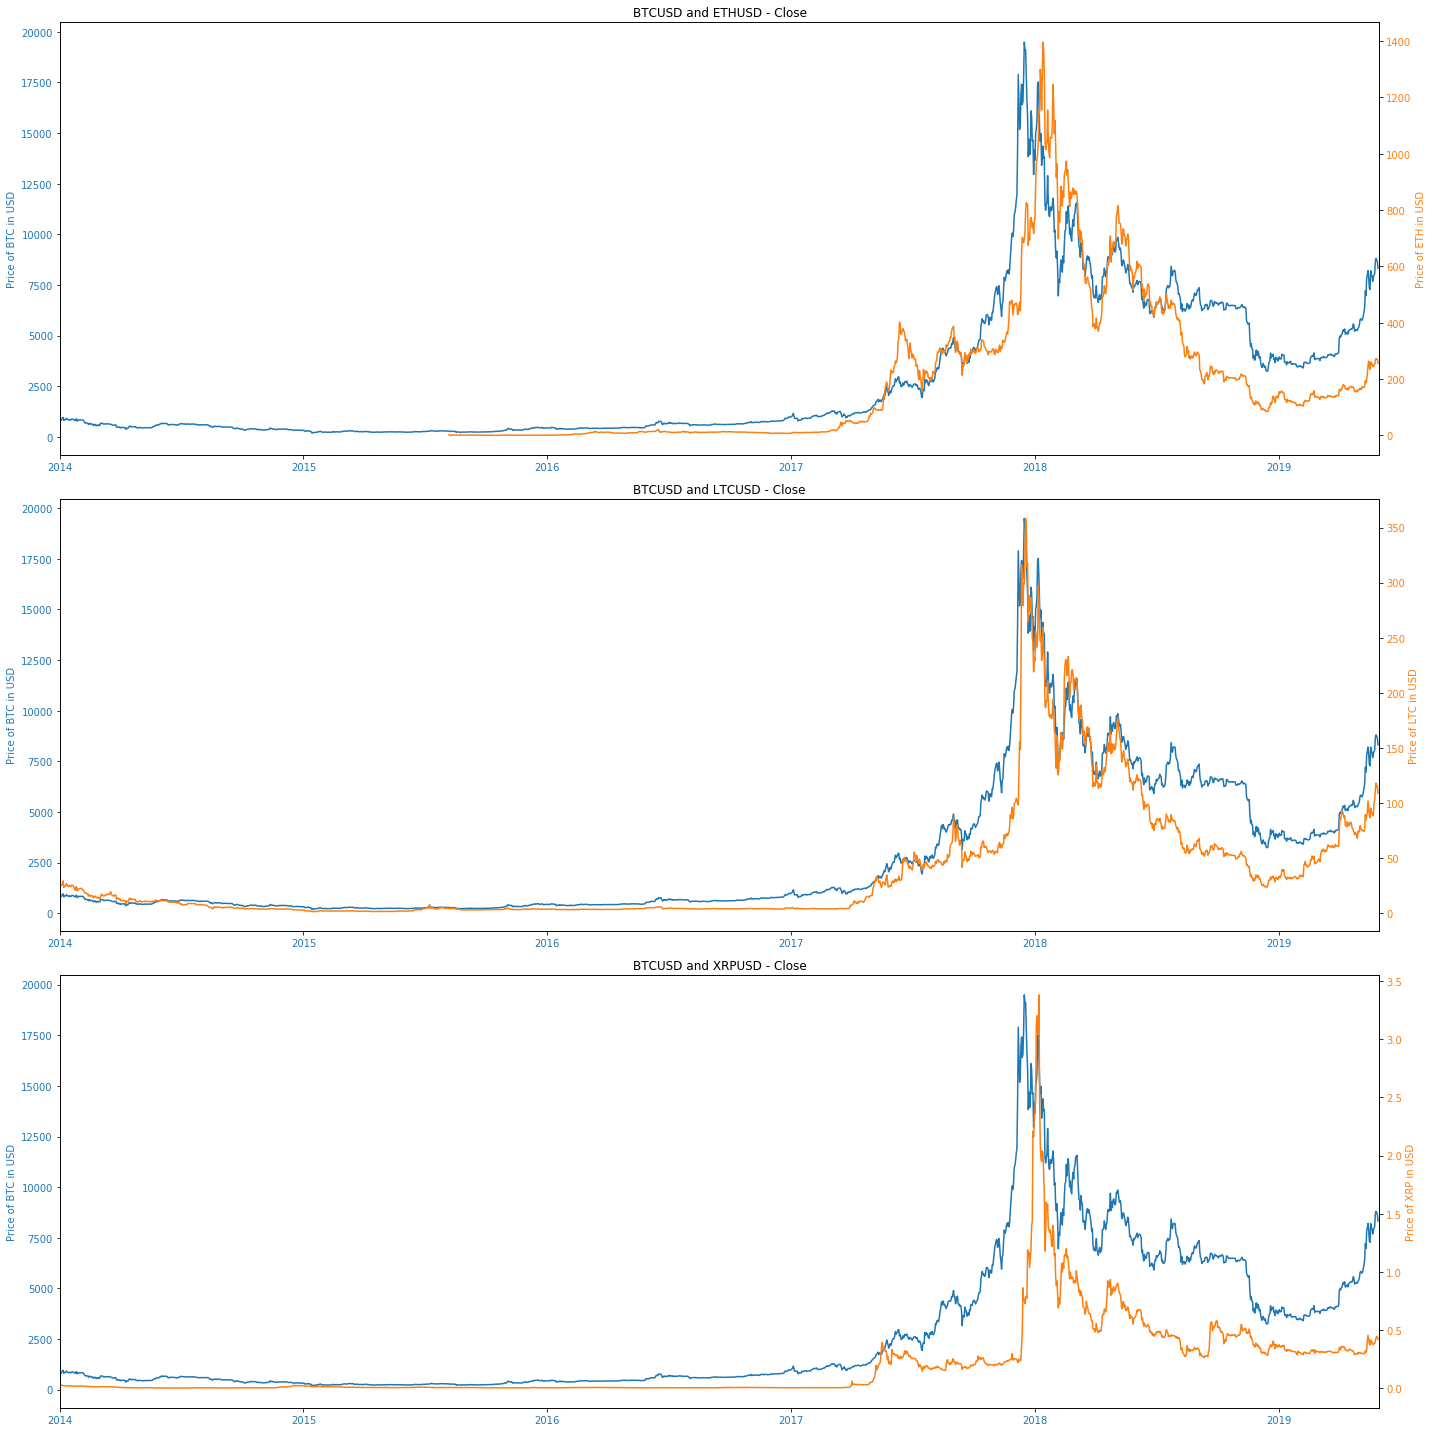

In [17]:
plt.figure(figsize=[20, 20])

# Subplot 1
# BTC
color = 'tab:blue'
ax1 = plt.subplot(3, 1, 1)
plt.plot(crypto.BTC.Close, color=color)
ax1.set_ylabel('Price of BTC in USD', color=color)
ax1.tick_params(labelcolor=color)
# ETH
color = 'tab:orange'
ax2 = ax1.twinx()
plt.plot(crypto.ETH.Close, color=color)
ax2.set_ylabel('Price of ETH in USD', color=color)
ax2.tick_params(labelcolor=color)
# Title
plt.title('BTCUSD and ETHUSD - Close')
plt.xlim('2014-01-01', '2019-06-01')

# Subplot 2
# BTC
color = 'tab:blue'
ax1 = plt.subplot(3, 1, 2)
plt.plot(crypto.BTC.Close, color=color)
ax1.set_ylabel('Price of BTC in USD', color=color)
ax1.tick_params(labelcolor=color)
# LTC
color = 'tab:orange'
ax2 = ax1.twinx()
plt.plot(crypto.LTC.Close, color=color)
ax2.set_ylabel('Price of LTC in USD', color=color)
ax2.tick_params(labelcolor=color)
# Title
plt.title('BTCUSD and LTCUSD - Close')
plt.xlim('2014-01-01', '2019-06-01')

# Subplot 3
# BTC
color = 'tab:blue'
ax1 = plt.subplot(3, 1, 3)
plt.plot(crypto.BTC.Close, color=color)
ax1.set_ylabel('Price of BTC in USD', color=color)
ax1.tick_params(labelcolor=color)
# ETH
color = 'tab:orange'
ax2 = ax1.twinx()
plt.plot(crypto.XRP.Close, color=color)
ax2.set_ylabel('Price of XRP in USD', color=color)
ax2.tick_params(labelcolor=color)
# Title
plt.title('BTCUSD and XRPUSD - Close')
plt.xlim('2014-01-01', '2019-06-01')

plt.tight_layout() # Right y label is not clipped

Note that ETHUSD prices are only available from July 2015 because Ethereum was released around this time.

Pickle the data

In [18]:
with open('data_coinmarketcap.pickle', 'wb') as f:
    pickle.dump(crypto, f)
    
f.close()

## Conclusion

In this article, we identified sources of cryptocurrency historical data such as using APIs and scraping web pages. Using APIs provides a convenient way of retrieving data. A drawback using them, particularly under their free subscription plan, is the limited historical data collected. Scraping websites requires a bit more effort than using APIs, but offers more extensive datasets. In the next article, we will use the historical data collected here to backtest a trading strategy using cryptocurrency pairs.